In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

# Prepare Data

In [2]:
df = pd.read_csv("/kaggle/input/adni1-final/Gene_Data_Adni_1.csv")

In [3]:
df = pd.read_csv("/kaggle/input/adni1-final/Gene_Data_Adni_1.csv").drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.2","Unnamed: 0.3","ID"], axis=1)

In [4]:
df['label'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['label'])

# Encode categorical data 

In [5]:
#CN 1, AD 0, MCI 2
#M 1, F 0
label_encoder = LabelEncoder()
df["label"]= label_encoder.fit_transform(df["label"])
df["gender"]= label_encoder.fit_transform(df["gender"])

In [7]:
features = df.drop('label',axis=1)
label= df.label

In [8]:
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,stratify=label,random_state = 42)

# Class weights 

In [9]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(y_train),
                                                 y = y_train)
print(class_weights)
class_weights_dict = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}
print(class_weights_dict)

class_weights_1 = class_weight.compute_sample_weight(class_weight = 'balanced' , y = np.array(y_train))
print(class_weights_1)

# # # class_weights_dict = {0: 2, 1: 2, 2: 1}


[1.16755793 0.69312169 1.42701525]
{0: 1.1675579322638145, 1: 0.6931216931216931, 2: 1.4270152505446623}
[1.16755793 0.69312169 1.42701525 0.69312169 1.16755793 0.69312169
 0.69312169 1.16755793 0.69312169 0.69312169 0.69312169 1.16755793
 1.42701525 1.42701525 1.42701525 1.16755793 1.16755793 1.16755793
 1.16755793 0.69312169 0.69312169 0.69312169 0.69312169 1.16755793
 0.69312169 1.42701525 1.16755793 1.42701525 0.69312169 0.69312169
 0.69312169 0.69312169 1.16755793 1.42701525 0.69312169 0.69312169
 1.16755793 0.69312169 1.16755793 1.16755793 1.16755793 0.69312169
 1.42701525 0.69312169 0.69312169 1.16755793 1.42701525 0.69312169
 0.69312169 1.16755793 0.69312169 1.42701525 0.69312169 0.69312169
 1.16755793 1.42701525 0.69312169 0.69312169 1.42701525 1.16755793
 1.42701525 1.16755793 0.69312169 0.69312169 0.69312169 1.16755793
 0.69312169 1.42701525 1.16755793 1.42701525 1.42701525 0.69312169
 0.69312169 0.69312169 0.69312169 0.69312169 0.69312169 0.69312169
 0.69312169 1.42701525 0

# GBTrees classifier 

In [ ]:
# GBTkfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# hyperparameters = {"learning_rate" : [0.1, 0.2, 0.3], "n_estimators" : [100,300,500,700,900], "criterion" : ['friedman_mse', 'squared_error'], "min_samples_split" : [2,4,6,8,10],"min_samples_leaf": [1,2,3], "max_depth": [3, 6, 9,12]}

# bestModelFound = GridSearchCV(GradientBoostingClassifier(random_state=42),hyperparameters,scoring='accuracy',cv=GBTkfold,n_jobs=-1)
# bestModelFound.fit(x_train,y_train, sample_weight = class_weights_1)
# print("The best score found is:",bestModelFound.best_score_)

# best_learning_rate= bestModelFound.best_params_.get("learning_rate")
# print("best learning rate:",best_learning_rate)

# bestNestimators = bestModelFound.best_params_.get("n_estimators")
# print("The best N estimators is:",bestNestimators)

# bestCriterion = bestModelFound.best_params_.get("criterion")
# print("The best Criterion is:",bestCriterion)

# bestMinSampleSplit = bestModelFound.best_params_.get("min_samples_split")
# print("The best Min sample split is:",bestMinSampleSplit)
                                            
# bestMinSampleLeaf = bestModelFound.best_params_.get("min_samples_leaf")
# print("The best Min sample Leaf is:",bestMinSampleLeaf)
                                            
# bestMaxDepth = bestModelFound.best_params_.get("max_depth")
# print("The best Max Depth is:",bestMaxDepth)

# results = cross_val_score(GradientBoostingClassifier(n_estimators=bestNestimators, learning_rate=best_learning_rate, max_depth=bestMaxDepth,criterion=bestCriterion,min_samples_split=bestMinSampleSplit, min_samples_leaf=bestMinSampleLeaf, random_state=42), x_train, y_train, cv = GBTkfold)
# print("Cross val score : ", results)
# print("accuracy is : ", results.mean()*100)

In [ ]:
# gbt = GradientBoostingClassifier(n_estimators=bestNestimators, learning_rate=best_learning_rate, max_depth=bestMaxDepth,criterion=bestCriterion,min_samples_split=bestMinSampleSplit, min_samples_leaf=bestMinSampleLeaf, random_state=42)

In [10]:
gbt = GradientBoostingClassifier(random_state=42)

In [ ]:
#gbt.fit(x_train, y_train, sample_weight = class_weights_1 )

In [ ]:
#gbt_predict = gbt.predict(x_test)

# Random Forest 

In [11]:
RF = RandomForestClassifier(n_estimators = 300, criterion = "gini", max_depth = 20, max_features = "auto", min_samples_split = 3, min_samples_leaf = 2, random_state = 42)
#, class_weight = class_weights_dict

In [ ]:
#RF.fit(x_train, y_train)

In [ ]:
#RF_predict = RF.predict(x_test)

# XGBoost 

In [12]:
xb = xgb.XGBClassifier(random_state=42)
# min_child_weight = 3, gamma= 0, max_depth = 5, subsample = 1,

In [ ]:
#xb.fit(x_train, y_train, sample_weight = class_weights_1 )

In [ ]:
#xb_predict = xb.predict(x_test)

# MLP

In [13]:
MLP = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200,random_state=42)

In [ ]:
#MLP.fit(x_train, y_train)

In [ ]:
#MLP_predict = MLP.predict(x_test)

In [14]:
models = dict()
models['gbt'] = gbt
models['RF'] = RF
models['xb'] = xb
models['MLP'] = MLP




In [15]:
level0 = list()
level0.append(('gbt', gbt))
level0.append(('RF', RF))
level0.append(('xb', xb))
level0.append(('MLP', MLP))

In [16]:
level1 = MLP

In [17]:
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [18]:
model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

StackingClassifier(cv=5,
                   estimators=[('gbt',
                                GradientBoostingClassifier(random_state=42)),
                               ('RF',
                                RandomForestClassifier(max_depth=20,
                                                       max_features='auto',
                                                       min_samples_leaf=2,
                                                       min_samples_split=3,
                                                       n_estimators=300,
                                                       random_state=42)),
                               ('xb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=42, ...)),
                               ('MLP',
                                MLPClassifier(hidden_layer_sizes=(10,),
                                              random_state=42))],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(10,),
                                                 random_state=42))

In [19]:
stack_pred =model.predict(x_test)

# compare predictions 

In [21]:
print(np.array(y_test))
print("accruracy score is : " , accuracy_score(np.array(y_test), stack_pred)) 

[1 2 0 2 1 1 2 0 2 1 2 0 1 0 1 2 2 1 1 1 1 2 0 0 1 2 0 1 2 1 0 1 1 1 0 1 2
 0 0 2 0 2 0 0 2 1 1 0 1 0 0 1 1 2 0 1 0 1 1 1 1 0 0 0 2 0 2 2 1 1 1 1 0 2
 1 0 2 1 1 2 1 0 1 1 2 0 1 1 2 1 2 2 0 1 1 0 1 0 1 2 0 1 1 1 1 2 1 1 0 1 1
 1 1 0 1 2 0 2 2 0 2 1 1 0 1 1 2 1 1 0 1 0 0 2 2 0 0 1 0 1 1 1 1 1 1 2 1 2
 1 1 0 1 1 1 0 2 0 1 0 1 1 0 2 1]
accruracy score is :  0.5609756097560976


# Confusion matrix 

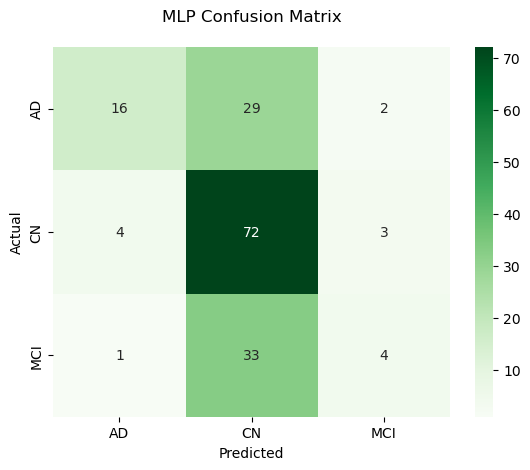

In [22]:
label_name=["AD","CN","MCI"]
ConfusionMatrix = confusion_matrix(np.array(y_test),np.array(stack_pred))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("MLP Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report 

In [23]:
print("Classification Report of the Combined Models\n")
print(classification_report(np.array(y_test),np.array(stack_pred), target_names=["AD","CN","MCI"]))

Classification Report of the Combined Models

              precision    recall  f1-score   support

          AD       0.76      0.34      0.47        47
          CN       0.54      0.91      0.68        79
         MCI       0.44      0.11      0.17        38

    accuracy                           0.56       164
   macro avg       0.58      0.45      0.44       164
weighted avg       0.58      0.56      0.50       164

